In [3]:
import numpy as np
import pandas as pd
import sklearn.linear_model as lm
import statsmodels.api as sm
import patsy as pt
from ggplot import *

# show graphs right in the notebook (rather that in another window)
%matplotlib inline

In [24]:
# load a data file
df = pd.DataFrame.from_csv("http://roman-kh.github.io/files/linear-models/simple1.csv")
print(df)
# x - a table with factors x1,x2,x3
x = df.iloc[:,:-1]
# y - a table with a dependent variable
y = df.iloc[:,-1]
df.head()

            x1          x2   x3           y
0    17.486288  185.505167  0.0  161.600365
1    32.353509  182.540139  0.0  157.077034
2    20.629644  190.742210  0.0  155.571362
4    29.396574  169.742980  0.0  147.232886
5    19.673511  191.574909  0.0  149.530893
6    15.556438  155.332122  0.0  146.833537
7    26.156556  164.948770  0.0  142.106386
8    33.093134  183.057357  0.0  152.470491
9    19.682189  167.404882  0.0  151.519127
11   21.003913  142.630078  0.0  136.560387
12   32.655463  201.403266  0.0  151.942454
14   27.529751  168.969318  0.0  139.055153
15   20.373621  191.220135  0.0  155.832069
18   24.282309  206.167274  0.0  161.640303
20   21.834040  173.341951  0.0  144.148168
21   28.967966  212.102958  0.0  164.475191
22   22.760197  155.806211  0.0  134.847603
23   26.465712  185.469171  0.0  153.100342
24   31.275311  174.610834  0.0  145.844660
25    8.081888  190.412463  0.0  153.864870
26    5.000428  196.152256  0.0  152.707359
27   36.345179  147.099159  0.0 

/home/nikita/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


,x1,x2,x3,y
0,17.486288,185.505167,0.0,161.600365
1,32.353509,182.540139,0.0,157.077034
2,20.629644,190.742210,0.0,155.571362
4,29.396574,169.742980,0.0,147.232886
5,19.673511,191.574909,0.0,149.530893


In [18]:
x_ = sm.add_constant(x)
smm = sm.OLS(y, x_)
res = smm.fit()
b = res.params.values
# model coefficients
b

array([20.2155354 ,  0.07461561,  0.71544973, 19.46500514])

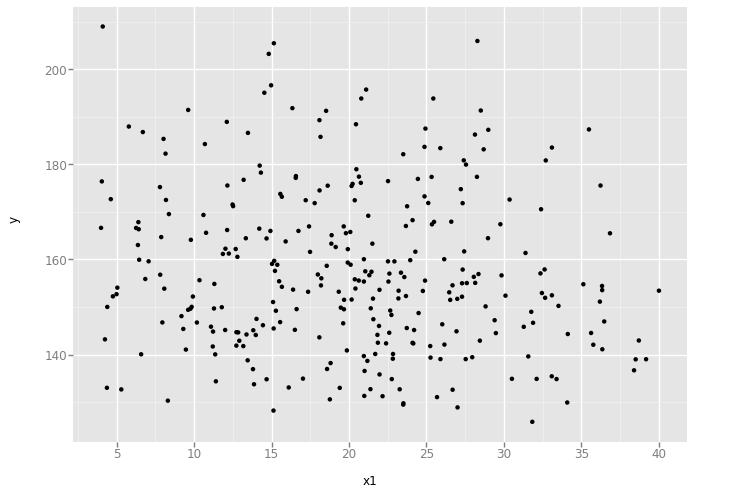

<ggplot: (8764662081228)>

In [6]:
ggplot(aes(x="x1", y="y"), data=df) + geom_point()

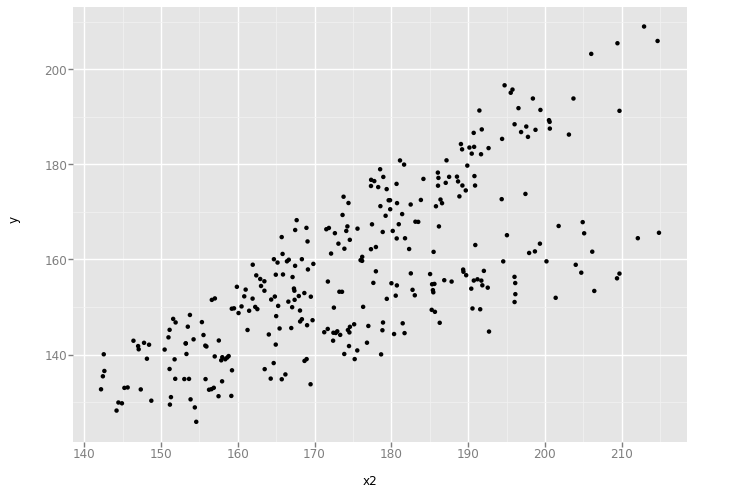

<ggplot: (-9223363272192720647)>

In [7]:
ggplot(aes(x="x2", y="y"), data=df) + geom_point()

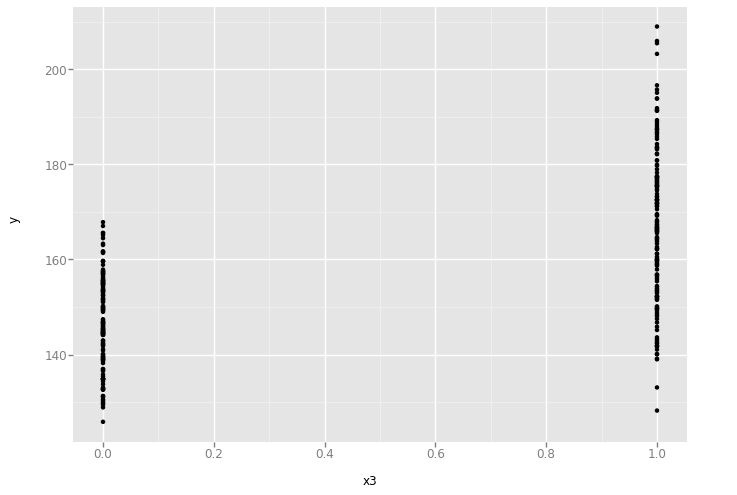

<ggplot: (-9223363272192772506)>

In [8]:
ggplot(aes(x="x3", y="y"), data=df) + geom_point()

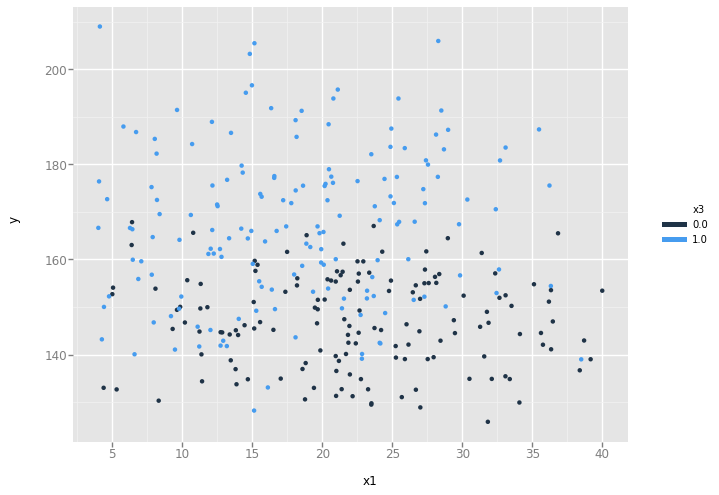

<ggplot: (8764658979013)>

In [12]:
ggplot(aes(x="x1", y="y", color="x3"), data=df) + geom_point()

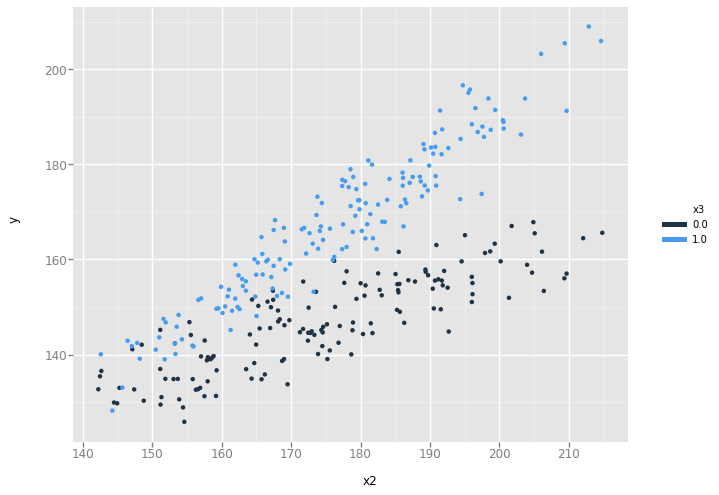

<ggplot: (-9223363272196023955)>

In [13]:
ggplot(aes(x="x2", y="y",color="x3"), data=df) + geom_point()

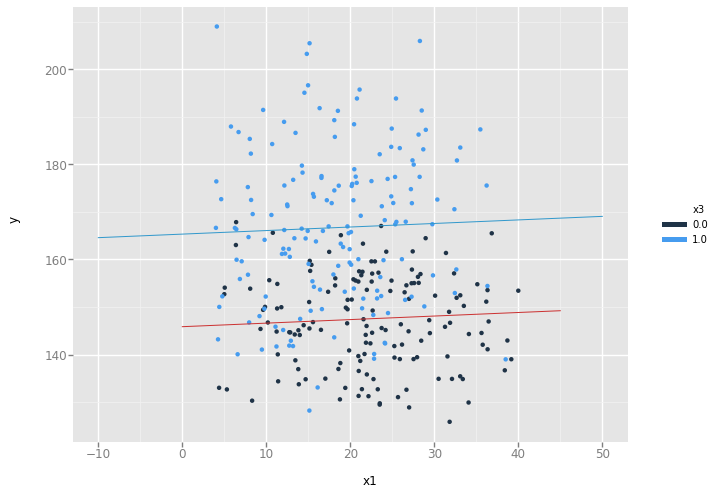

<ggplot: (-9223363272196412528)>

In [20]:

# calculate intercept for both lines: x3=0 and x3=1
b0w = b[0] + df["x2"].mean() * b[2] 
b0m = b[0] + df["x2"].mean() * b[2] + b[3] 

gg = ggplot(aes(x="x1",y="y",color="x3"),data=df) + geom_point()
gg += geom_abline(intercept=b0w, slope=b[1], color="#CC3333")
gg += geom_abline(intercept=b0m, slope=b[1], color="#3399CC")
gg

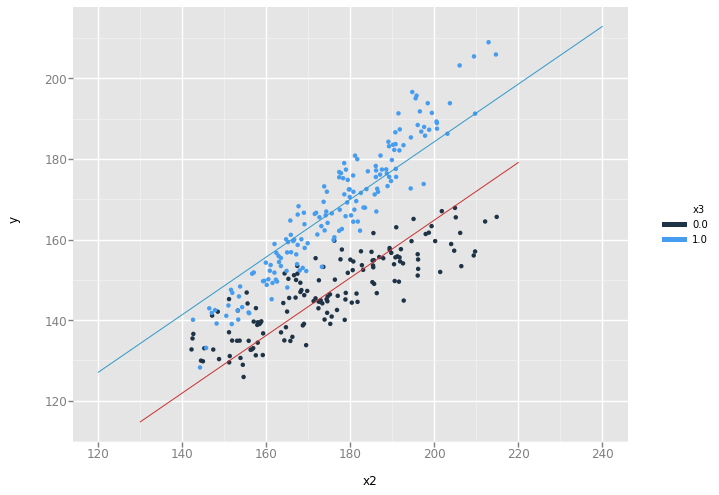

<ggplot: (8764658465288)>

In [22]:

b0w = b[0] + df["x1"].mean() * b[1] 
b0m = b[0] + df["x1"].mean() * b[1] + b[3]

gg = ggplot(aes(x="x2",y="y",color="x3"),data=df) + geom_point()
gg += geom_abline(intercept=b0w, slope=b[2], color="#CC3333")
gg += geom_abline(intercept=b0m, slope=b[2], color="#3399CC")
gg